In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import random


True
True


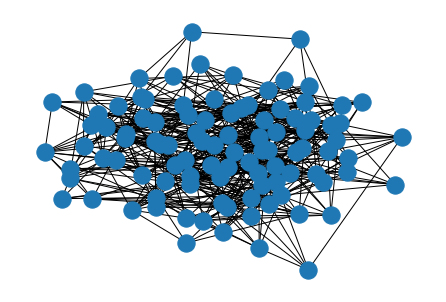

In [7]:
np.random.seed(42)

n = 100
m = 500

g = nx.gnm_random_graph(n, m, seed=42)
weights = np.random.randint(100, size=m)

weights_matrix = np.zeros((m, m))

for i, elem in enumerate(g.edges()):
    g[elem[0]][elem[1]]['weight'] = weights[i]
    g[elem[1]][elem[0]]['weight'] = weights[i]
print(np.all(nx.linalg.graphmatrix.adjacency_matrix(g).todense() == nx.linalg.graphmatrix.adjacency_matrix(g).todense().T))
print(np.all(nx.linalg.graphmatrix.adjacency_matrix(g).todense() >= 0))
nx.draw(g)


In [8]:
n_experiments = 10

def measure_time(n_experiments, method, g, source, dest):
    times = []
    for i in range(n_experiments):
        start_time = timer()
        method(g, source, dest, 'weight')
        times.append(timer() - start_time)
    
    return np.array(times, dtype=np.float64).mean(axis=0)


print('Dijkstra time {:.6f}'.format(measure_time(10, nx.algorithms.shortest_paths.weighted.dijkstra_path, g, 2, 69)))
print('Bellman-Ford time {:.6f}'.format(measure_time(10, nx.algorithms.shortest_paths.weighted.bellman_ford_path, g, 2, 69)))

Dijkstra time 0.000078
Bellman-Ford time 0.001497


[(0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (4, 3), (4, 4), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (8, 4), (8, 3), (9, 3)]


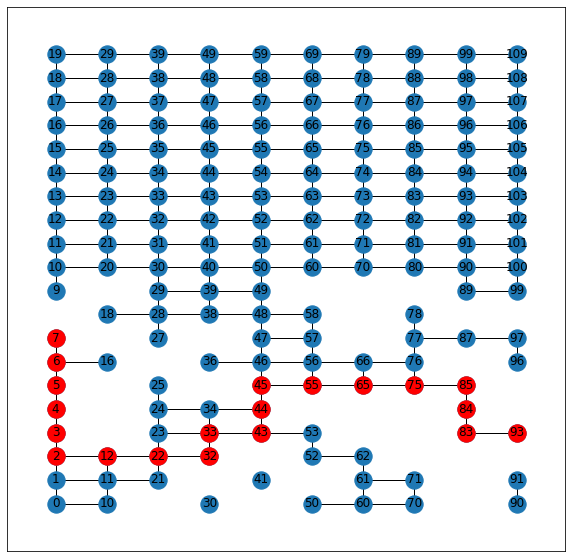

In [9]:
plt.figure(figsize=(10, 10))
N = 10
M = 20
obstacles = 40
np.random.seed(42)
G = nx.grid_2d_graph(N, M)
edges_to_delete = np.random.randint(0, N, size=(obstacles, 2))
edges_to_delete = list(map(tuple, edges_to_delete))
G.remove_nodes_from(edges_to_delete)
pos = dict((n, n) for n in G.nodes())
labels = dict(((i, j), i * 10 + j) for i, j in G.nodes())
nx.draw_networkx(G, pos=pos, labels=labels)
path = nx.algorithms.shortest_paths.astar.astar_path(G, (0, 7), (9, 3))
print(path)
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r')


path from (9, 17) to (1, 14):
[(9, 17), (8, 17), (7, 17), (6, 17), (5, 17), (4, 17), (3, 17), (2, 17), (1, 17), (1, 16), (1, 15), (1, 14)]
path from (0, 6) to (4, 3):
[(0, 6), (0, 5), (0, 4), (0, 3), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (4, 3)]
path from (3, 13) to (3, 8):
[(3, 13), (3, 12), (3, 11), (3, 10), (3, 9), (3, 8)]
path from (2, 2) to (1, 12):
[(2, 2), (3, 2), (3, 3), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (3, 8), (2, 8), (2, 9), (2, 10), (1, 10), (1, 11), (1, 12)]
path from (8, 9) to (1, 6):
[(8, 9), (8, 10), (7, 10), (6, 10), (5, 10), (4, 10), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5), (4, 4), (3, 4), (2, 4), (2, 3), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 6)]


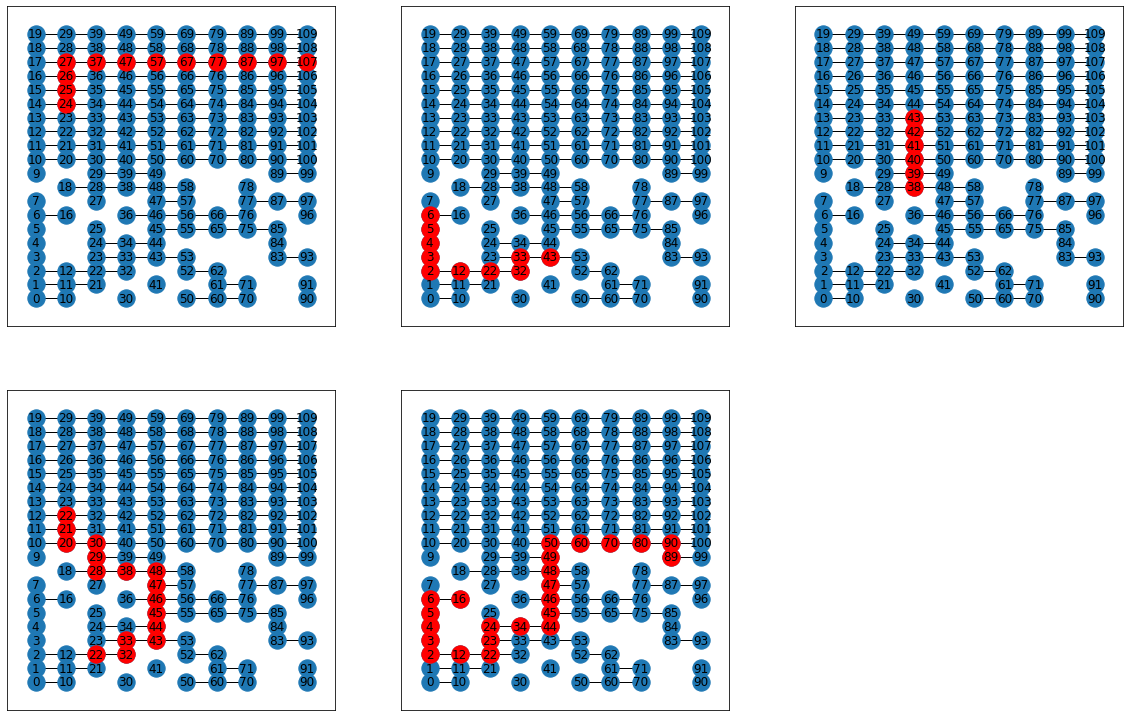

In [11]:
random.seed(42)
n_experiments = 5

fig = plt.figure(figsize=(20, 20))

for i in range(n_experiments):
    subplot = 331 + i
    start_node = random.choice(list(G.nodes()))
    end_node = random.choice(list(G.nodes()))
    print(f'path from {start_node} to {end_node}:')
    path = nx.algorithms.shortest_paths.astar.astar_path(
        G, start_node, end_node)
    ax = fig.add_subplot(subplot)
    nx.draw_networkx(G, pos=pos, labels=labels)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r')
    print(path)
